## Simulating impact of COVID-19 restrictions relaxation on hospital resources in British Columbia

Team:

* Adnan Beg
* Nammn Joshii
* Teguh Samudra
* Pratibha Thakur

## Sources

[1] https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection.html

[2] https://resources-covid19canada.hub.arcgis.com/pages/demographics

[3] https://www.indexmundi.com/canada/age_structure.html

[4] https://www.worldometers.info/coronavirus/coronavirus-age-sex-demographics/

[5] https://ici.radio-canada.ca/info/2020/coronavirus-covid-19-pandemie-cas-carte-maladie-symptomes-propagation/

[6] https://www.theglobeandmail.com/canada/british-columbia/article-bc-should-have-enough-beds-and-ventilators-for-covid-19-patients/

# Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.stats import truncnorm
from collections import Counter
import math
import seaborn as sns
import requests
import IPython.display as Disp

# Import Dataset

In [2]:
raw = pd.read_csv("covid19.csv")
drop_col = ['pruid', 'prnameFR', 'numprob', 'percentrecover', 'ratetested']
covid_bc = raw[raw['prname'] == "British Columbia"].drop(drop_col, axis = 1)
covid_bc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 1 to 522
Data columns (total 9 columns):
prname         48 non-null object
date           48 non-null object
numconf        48 non-null int64
numdeaths      48 non-null float64
numtotal       48 non-null int64
numtested      32 non-null float64
numrecover     2 non-null float64
numtoday       45 non-null float64
percentoday    45 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 3.8+ KB


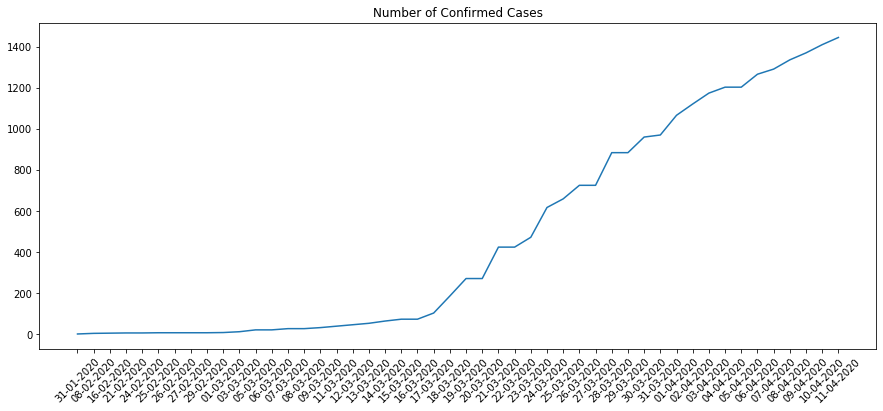

In [84]:
plt.figure(figsize=(15,6))
plt.plot(covid_bc['date'], covid_bc['numconf'])
plt.title("Number of Confirmed Cases")
plt.xticks(rotation = 45)
plt.show()

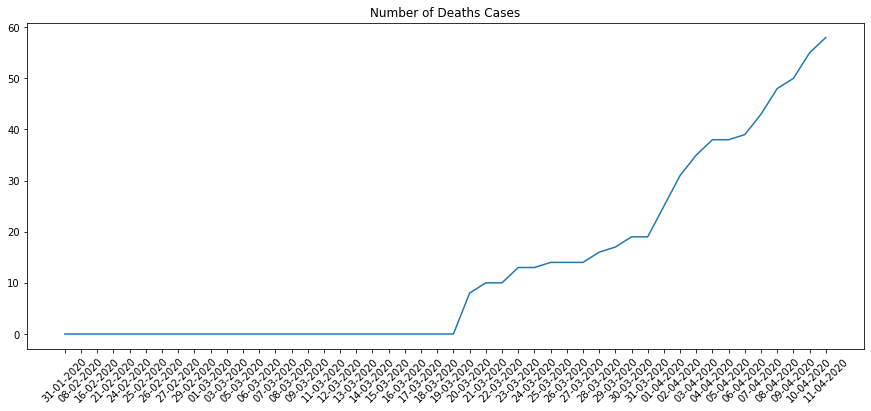

In [85]:
plt.figure(figsize=(15,6))
plt.plot(covid_bc['date'], covid_bc['numdeaths'])
plt.title("Number of Deaths Cases")
plt.xticks(rotation = 45)
plt.show()

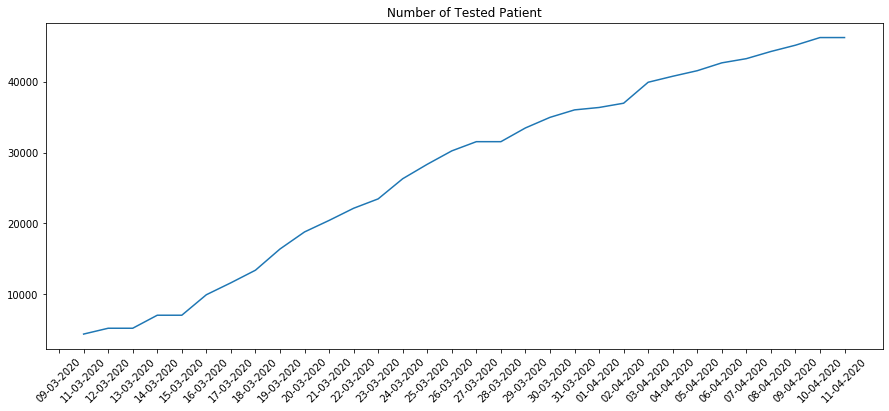

In [86]:
plt.figure(figsize=(15,6))
plt.plot(covid_bc['date'], covid_bc['numtested'])
plt.title("Number of Tested Patient")
plt.xticks(rotation = 45)
plt.show()

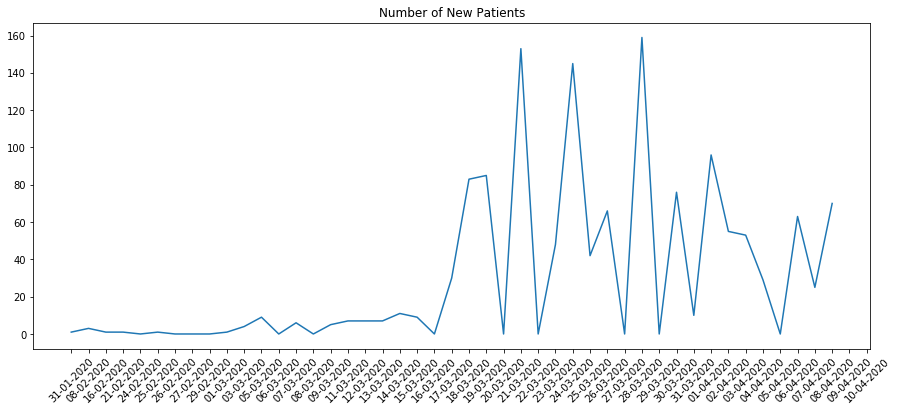

In [87]:
plt.figure(figsize=(15,6))
plt.plot(covid_bc['date'], covid_bc['numtoday'])
plt.title("Number of New Patients")
plt.xticks(rotation = 45)
plt.show()

Text(0, 0.5, 'Daily Cases')

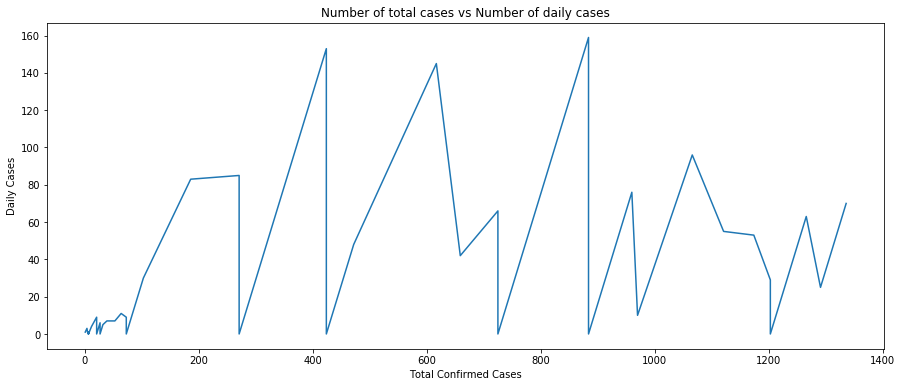

In [97]:
plt.figure(figsize=(15,6))
plt.plot(covid_bc['numconf'], covid_bc['numtoday'])
plt.title('Number of total cases vs Number of daily cases')
plt.xlabel("Total Confirmed Cases")
plt.ylabel("Daily Cases")

In [8]:
covid_bc['todaytest'] = covid_bc['numtested'].diff()

In [9]:
DAILY_TEST_AVG = np.mean(covid_bc['todaytest'])
DAILY_TEST_STD = np.floor(np.std(covid_bc['todaytest']))
DAILY_TEST_MAX = np.max(covid_bc['todaytest'])
print("On average, there are {} tests administered everyday".format(np.floor(DAILY_TEST_AVG)))
print("with a standard deviation of {}".format(DAILY_TEST_STD))
print("and a maximum of {} tests".format(DAILY_TEST_MAX))

On average, there are 1350.0 tests administered everyday
with a standard deviation of 875.0
and a maximum of 2994.0 tests


# Create Population Pyramid Using Age

## Age Group

In [10]:
np.random.seed(69)
# Age group = 0-4
AGE_GRP1 = 228784
group1_dist = list(np.floor(np.random.uniform(0,4, size = AGE_GRP1)))

# Age group = 5-9
AGE_GRP2 = 236493
group2_dist = list(np.floor(np.random.uniform(5,9, size = AGE_GRP2)))

# Age Group = 10-14
AGE_GRP3 = 240928
group3_dist = list(np.floor(np.random.uniform(10,14, size = AGE_GRP3)))

# Age Group = 15-19 
AGE_GRP4 = 255862
group4_dist = list(np.floor(np.random.uniform(15,19, size = AGE_GRP4)))

# Age Group = 20-24
AGE_GRP5 = 324323
group5_dist = list(np.floor(np.random.uniform(20,24, size = AGE_GRP5)))

# Age Group 25-29
AGE_GRP6 = 339551
group6_dist = list(np.floor(np.random.uniform(25,29, size = AGE_GRP6)))

# Age Group 30-34 
AGE_GRP7 = 343054
group7_dist = list(np.floor(np.random.uniform(30,34, size = AGE_GRP7)))

# Age Group 35-39
AGE_GRP8 = 341241
group8_dist = list(np.floor(np.random.uniform(35,39, size = AGE_GRP8)))

# Age Group 40-44
AGE_GRP9 = 314422
group9_dist = list(np.floor(np.random.uniform(40, 44, size = AGE_GRP9)))

# Age Group 45-49
AGE_GRP10 = 322176
group10_dist = list(np.floor(np.random.uniform(45,49, size = AGE_GRP10)))

# Age Group 50-54 
AGE_GRP11 = 329941
group11_dist = list(np.floor(np.random.uniform(50,54, size = AGE_GRP11)))

#Age Group 55-59
AGE_GRP12 = 358588
group12_dist = list(np.floor(np.random.uniform(55,59, size = AGE_GRP12)))

# Age Group 60-64
AGE_GRP13 = 337108
group13_dist = list(np.floor(np.random.uniform(60,64, size = AGE_GRP13)))

# Age 65-69
AGE_GRP14 = 292760
group14_dist = list(np.floor(np.random.uniform(65,69, size = AGE_GRP14)))

# Age 70-74
AGE_GRP15 = 244029
group15_dist = list(np.floor(np.random.uniform(70,74, size = AGE_GRP15)))

# Age Group 75-79
AGE_GRP16 = 168673
group16_dist = list(np.floor(np.random.uniform(75,79, size = AGE_GRP16)))

# Age Group 80-84
AGE_GRP17 = 114197
group17_dist = list(np.floor(np.random.uniform(80,84, size = AGE_GRP17)))

# Age Group 85+
AGE_GRP18 = 120270
group18_dist = list(np.floor(np.random.uniform(85,89, size = AGE_GRP18)))

# Total Population
total_pop =  AGE_GRP1 + AGE_GRP2 + AGE_GRP3 + AGE_GRP4 + AGE_GRP5 + AGE_GRP6 + AGE_GRP7 + AGE_GRP8 + AGE_GRP9 + AGE_GRP10 + AGE_GRP11 + AGE_GRP12 + AGE_GRP13 + AGE_GRP14 + AGE_GRP15 + AGE_GRP16 + AGE_GRP17 + AGE_GRP18 
total_pop

4912400

## Simulate Age Distribution

In [11]:
np.random.seed(69)

In [12]:
def simulate_trunc_dist(mean, stdev, minimum, maximum, rep_size):
    """This function simulate a truncated distribution that has a range of [minimum, maximum],
    with mean and std. dev"""

    """The function truncnorm requires shape parameter a and b"""

    param_a = (minimum - mean) / stdev
    param_b = (maximum - mean) / stdev

    random_variable = truncnorm.rvs(param_a, param_b, loc=mean, scale=stdev, size=rep_size)

    return (list(np.floor(random_variable)))

## Create Distribution for Different Population

Using the age group information found in [2], we will try to mimic the age distribution of Vancouver using Canadian age distribution to get a close approximation:

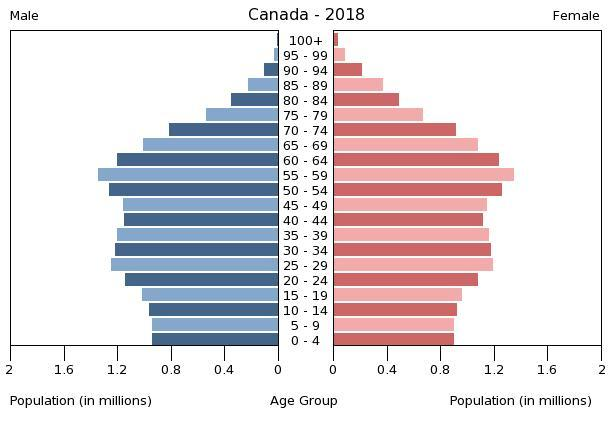

In [13]:
url = 'https://www.indexmundi.com/graphs/population-pyramids/canada-population-pyramid-2018.jpg'
Disp.Image(requests.get(url).content)

We do not separate our simulated population by gender

In [15]:
age_combined_list = group1_dist + group2_dist + group3_dist + group4_dist + group5_dist + group6_dist + group7_dist + group8_dist + group9_dist + group10_dist + group11_dist + group12_dist + group13_dist + group14_dist + group15_dist + group16_dist + group17_dist + group18_dist

Text(0.5, 1.0, 'Vancouver Population Pyramid')

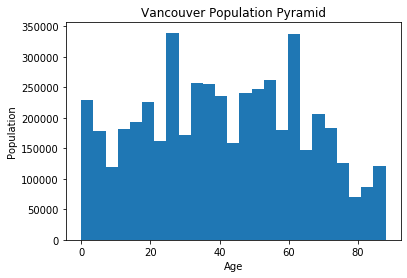

In [16]:
plt.hist(age_combined_list,bins=25)
plt.xlabel("Age")
plt.ylabel("Population")
plt.title("Vancouver Population Pyramid")

# Simulate Pre-Existing Condition

Using the information found in [4], we will simulate a binomial draw for precondition. 

The array containing 0 and 1 will then be merge with our age population.

## Probability

In [17]:
CANCER_PROB = 0.0046
HYPER_PROB = 0.3
DIA_PROB = 0.1
CARDIO_PROB = 0.069
RESPIR_PROB = 0.1

In [18]:
np.random.seed(69)
have_cancer = list(np.random.binomial(1, CANCER_PROB, total_pop))
Counter(have_cancer)

Counter({0: 4889830, 1: 22570})

ASSUMPTION: hypertension has equal probability (30%) regardless of age

In [19]:
np.random.seed(69)
have_hypertension = list(np.random.binomial(1, HYPER_PROB, total_pop))
Counter(have_hypertension)

Counter({0: 3438797, 1: 1473603})

In [20]:
np.random.seed(69)
have_diabetes = list(np.random.binomial(1, DIA_PROB, total_pop))
Counter(have_diabetes)

Counter({0: 4421447, 1: 490953})

In [23]:
np.random.seed(69)
have_cardio = list(np.random.binomial(1, CARDIO_PROB, total_pop))
Counter(have_cardio)

Counter({0: 4573946, 1: 338454})

ASSUMPTION: respiratory has equal probability (10%) regardless of age

In [24]:
np.random.seed(69)
have_respir = list(np.random.binomial(1, RESPIR_PROB, total_pop))
Counter(have_respir)

Counter({0: 4421447, 1: 490953})

## Combined Simulated Dataframe

In [25]:
df = pd.DataFrame({
    'age': age_combined_list,
    'have_cancer': have_cancer,
    'have_cardio': have_cardio,
    'have_diabetes': have_diabetes,
    'have_hypertension': have_hypertension,
    'have_respir': have_respir
})

After merging the age population with the pre-condition information simulated above, the data frame looks like:

In [26]:
df.head()

,age,have_cancer,have_cardio,have_diabetes,have_hypertension,have_respir
0,1.0,0,0,0,0,0
1,3.0,0,0,0,1,0
2,1.0,0,0,0,0,0
3,3.0,0,0,0,1,0
4,2.0,0,0,0,0,0


# Mortality Approximation

## Approximation of exponential function

In [27]:
# Create a list containing integers from 0 to 100, this represent age of patients
age_range = list(np.arange(100))
# Create a list that represents mortality rate for different age group:
# Source: [4]
age_death_rate = np.repeat(np.array([0, 0.2, 0.4, 1.3, 3.6, 8.0, 14.8]),
                           [10, 30, 10, 10, 10, 10, 20])

Text(0.5, 1.0, 'Increasing Probability of Death at Different Age')

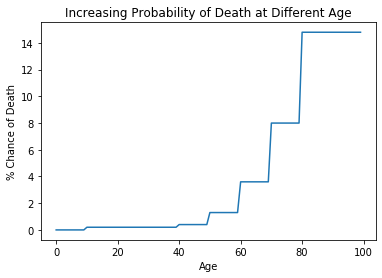

In [28]:
plt.plot(age_range,age_death_rate)
plt.xlabel("Age")
plt.ylabel("% Chance of Death")
plt.title("Increasing Probability of Death at Different Age")

We define critical patient as someone who has a high probability of dying as a function of his/her age and the number of pre-existing condition that person has. 

The figure shown above is only showing this probability as a function of age, so we need to come up with:

1. An approximation function that can mimic the graph above
2. A modified approximation function that not only mimic the graph but also accounting for patient's number of pre-existing condition

## Define Function

In [29]:
import math
def power(my_list, cond):
    """This function takes a list containing age of patient (x) and number of precondition"""
    """every element is x plug into function of f(age, precondition) = y"""
    """Return a list of y"""
    return [ (2.5*(1+cond))*math.exp(0.02*x-0.12) - 2.183 for x in my_list ]

In [30]:
def simulate_death_prob(age, pre_condition):
    """This function takes age of patient (age) and number of precondition (pre_condition)"""
    """It calculates the probability of dying using a pre defined function P(age, pre_condition) = y"""
    """Return probability of dying y"""
    probability = (2.5*(1+pre_condition))*math.exp(0.02*age-0.12) - 2.183
    return probability

## Probability of Death as a Function of Age Only

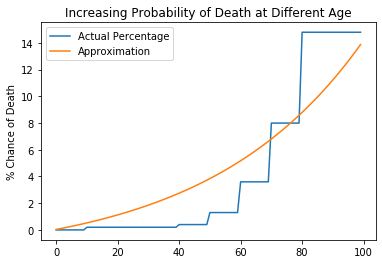

In [31]:
death_rate_model = power(age_range, 0)
plt.plot(age_range,age_death_rate)
plt.plot(age_range, death_rate_model)
plt.ylabel("% Chance of Death")
plt.title("Increasing Probability of Death at Different Age")
plt.legend(('Actual Percentage', 'Approximation'))

The yellow line shows our approximation curve as a function of age only

## Probability of Death with Interaction between Age and Number of Pre-Condition

Text(0.5, 1.0, 'Increasing Probability of Death at Different Age')

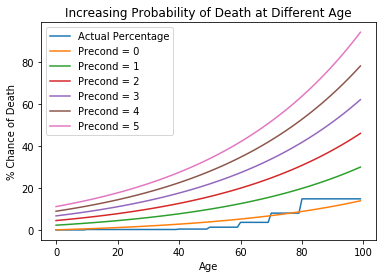

In [32]:
death_rate_model = power(age_range, 0)
death_rate_model1 = power(age_range, 1)
death_rate_model2 = power(age_range, 2)
death_rate_model3 = power(age_range, 3)
death_rate_model4 = power(age_range, 4)
death_rate_model5 = power(age_range, 5)
plt.plot(age_range, age_death_rate)
plt.plot(age_range, death_rate_model)
plt.plot(age_range, death_rate_model1)
plt.plot(age_range, death_rate_model2)
plt.plot(age_range, death_rate_model3)
plt.plot(age_range, death_rate_model4)
plt.plot(age_range, death_rate_model5)
plt.xlabel("Age")
plt.ylabel("% Chance of Death")
plt.legend(('Actual Percentage', 
            'Precond = 0', 'Precond = 1', 
            'Precond = 2', 'Precond = 3', 
            'Precond = 4', 'Precond = 5'))
plt.title("Increasing Probability of Death at Different Age")

As the number of pre-existing condition increases, the probability that the patient will die as a result of being in a critical group will increase at a faster rate.

# Data Sampling

We will sample a dataset containing 1000 samples from the simulated dataframe

In [33]:
df_sampled = df.sample(n = 1000, random_state=69)

In [34]:
df_sampled.head()

,age,have_cancer,have_cardio,have_diabetes,have_hypertension,have_respir
1124378,21.0,0,0,0,0,0
1287711,26.0,0,0,0,0,0
1864857,31.0,0,0,0,0,0
1536382,27.0,0,0,0,0,0
3232732,53.0,0,1,1,1,1


Assuming that each pre-condition has an equal weight the increasing the probability of death, we add the number number get a total precondition that every patient has

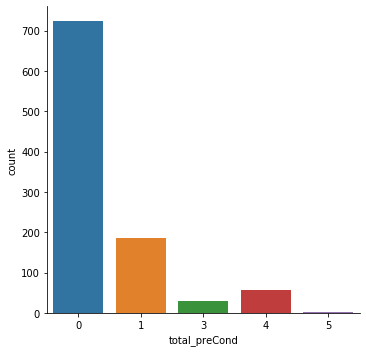

In [35]:
# Sum the number of pre-condition
df_sampled['total_preCond'] = df_sampled['have_cancer'] + df_sampled[
    'have_cardio'] + df_sampled['have_diabetes'] + df_sampled[
        'have_hypertension'] + df_sampled['have_respir']
sns.catplot(x = 'total_preCond', kind = 'count', data = df_sampled)

Out of this 1000 samples, this is a number of people with precondition

In [36]:

def calculate_critical_patients(df, age, precond_count):
    """ This function takes a dataframe, age of the patient column and 
    precondition column and simulate their death probability."""
    
    df['will_die'] = 0

    for index, value in df.iterrows():
        probability = simulate_death_prob(df[age][index],
                                          df[precond_count][index])
        """The probability is then used as binomial probability to find out if they are
        going to die or not"""
        
        df['will_die'][index] = np.random.binomial(1,
                                                   probability / 100,
                                                   size=1)
    """Return a dataframe with the added information in a new column"""

    return df

In [37]:
df_sampled_critical = calculate_critical_patients(df_sampled, 'age', 'total_preCond')

C:\Users\begad\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


## Sampled Data Result

Text(0.5, 1.0, '1000 Samples')

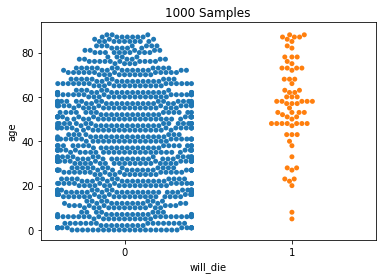

In [38]:
sns.swarmplot('will_die', 'age', data=df_sampled)
plt.title('1000 Samples')

Presented in a swarm plot above, the dots represent a single patients in the sampled group. Blue dots represents people that the simulation decided WILL NOT DIE if they were infected with COVID-19, while the ones in yellow are the people who WILL DIE if the were infected. 

The people in yellow are our critical groups, one that were most desperate to receive treatment and prioritized if the were tested positive of COVID-19

We now need to extend this analysis to the entire population of Vancouver to get an close approximation of how many critical patients there actually were if everyone were to be tested.

# Analysis on the entire population

In [39]:
# Create a new column that is the sum the precondition.
df['total_preCond'] = df['have_cancer'] + df['have_cardio'] + df[
    'have_diabetes'] + df['have_hypertension'] + df['have_respir']

Text(0.5, 1, 'Distribution of Total Number of Pre-Existing Condition')

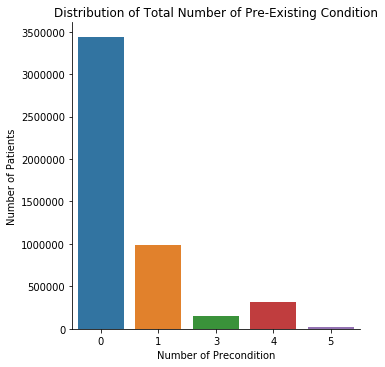

In [40]:
sns.catplot(x='total_preCond', kind='count', data=df)
plt.xlabel("Number of Precondition")
plt.ylabel("Number of Patients")
plt.title("Distribution of Total Number of Pre-Existing Condition")

The exact count of histogram above is:

In [41]:
Counter(df['total_preCond'])

Counter({0: 3438797, 1: 982650, 4: 315884, 3: 152499, 5: 22570})

#### Note:
The below simulation will take lot of time to run. We have already the simulated code and saved it in the file for your convenience. Please remove comment if you want to read that file in the below code.

In [42]:
#df_critical= pd.read_csv("Critical_patient.csv",index_col=0)

C:\Users\begad\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [39]:
np.random.seed(69)
df_critical = calculate_critical_patients(df, 'age', 'total_preCond')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


## Critical Patients

Text(0.5, 1, 'Critical Patients')

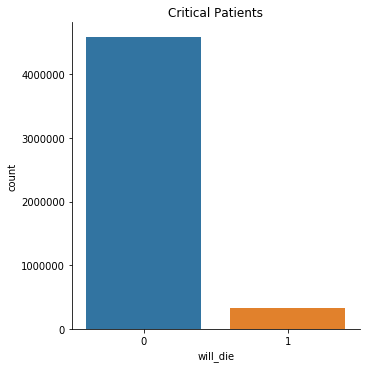

In [43]:
sns.catplot(x='will_die', kind='count', data=df_critical)
plt.title("Critical Patients")

In [44]:
Counter(df_critical['will_die'])

Counter({0: 4584720, 1: 327680})

In [45]:
def simulate_test_count(mean, stdev, maximum, size):
    """This function simulate a truncated test that has a range of [minimum, maximum],
    with mean and std. dev"""

    minimum = 0
    """The function truncnorm requires shape parameter a and b"""

    param_a = (minimum - mean) / stdev
    param_b = (maximum - mean) / stdev

    random_variable = truncnorm.rvs(param_a, param_b, loc=mean, scale=stdev,size=size)
    

    return (int(np.mean(random_variable)))

In [46]:
TIME_HORIZON = 10

In [47]:
def pick_random(list_all, list_exclude, pick_count):
    """This function takes a list containing numbers (list_all), a list containing a subset
    of number to be excluded from the pick, and pick random number from full list - excluded list"""
    
    """Left over list"""
    list_left = list(set(list_all)-set(list_exclude))
    
    """Randomly pick k number of items from the left over list"""
    picked_list = random.sample(list_left, k = pick_count)
    return picked_list

In [48]:

def reconfigure_list(list1):
    """This function unravel a list of lists and put every item in a single list to be returned"""
    """example: [[a,b], [c,d]] -> [a,b,c,d]"""
    list_length = len(list1)
    combined_list = []
    for i in range(list_length):
        combined_list.extend(list1[i])
    return combined_list

In [49]:
def simulate_corona_test(infection_rate, test_size):
    """This function draw a random binomial of count 'size' and weight the probability
    with infection rate"""
    
    result = np.random.binomial(1, infection_rate, size = test_size)
    
    """Return a list containing 1 or 0 from the draw"""
    return list(result) 

In [50]:
def simulate_day_test_scen1(df, period, infection_rate):
    """This function simulate a test everyday for the length of 'period', if infection rate increases to 6%"""
    
    """The index of the input dataframe will be contained into a list and will be identified as our
    'patient id'"""
    full_indexes = list(df.index)
    list_exclude = []
    
    patient_tested_list = []
    list_output = []
    day_num_list=[]
    positive_test_list = []
    
    for i in range(period):
        
        """For every iteration, a random number of test would be draw, this number of test will vary between
        0 and 2994, with a standard deviation of 889 tests"""
        
        infection_rate+=0.00067
        
        test_count = simulate_test_count(DAILY_TEST_AVG, DAILY_TEST_STD, DAILY_TEST_MAX, 1)
        
        """A random set of patient id of size 'test_count' will be drawn out from this list without replacement.
        This will be the people who is tested in today (in this iteration)"""
        
        patient_tested = pick_random(list_all = full_indexes, 
                                     list_exclude = list_exclude, 
                                     pick_count = test_count)
        
        patient_tested_list.append(patient_tested)
        
        """This is list of people who is already tested and will be excluded for the next iteration.
        Once a patient is tested, he/she would not be tested again. """
        list_exclude = list_exclude + patient_tested
        
        day_num_list.append(np.repeat([i+1], test_count))
        
        """This will generate the result."""
        positive_test = simulate_corona_test(infection_rate=infection_rate, test_size=test_count)
        positive_test_list.append(positive_test)
        
    
    """Prepare for export"""
    day_num_unraveled = reconfigure_list(day_num_list)
    patient_tested_unraveled = reconfigure_list(patient_tested_list)
    positive_test_unravel = reconfigure_list(positive_test_list)
    
    output_df = pd.DataFrame({
        'testing_day': day_num_unraveled,
        'patient_id': patient_tested_unraveled,
        'positive': positive_test_unravel
    })
    
    return output_df

In [51]:
def simulate_day_test_scen2(df, period, infection_rate):
    """This function simulate a test everyday for the length of 'period', if infection rate decreases to 0.5%"""
    
    """The index of the input dataframe will be contained into a list and will be identified as our
    'patient id'"""
    full_indexes = list(df.index)
    list_exclude = []
    
    patient_tested_list = []
    list_output = []
    day_num_list=[]
    positive_test_list = []
    
    for i in range(period):
        
        """For every iteration, a random number of test would be draw, this number of test will vary between
        0 and 2994, with a standard deviation of 889 tests"""
        
        infection_rate-=0.00056
        
        test_count = simulate_test_count(DAILY_TEST_AVG, DAILY_TEST_STD, DAILY_TEST_MAX, 1)
        
        """A random set of patient id of size 'test_count' will be drawn out from this list without replacement.
        This will be the people who is tested in today (in this iteration)"""
        
        patient_tested = pick_random(list_all = full_indexes, 
                                     list_exclude = list_exclude, 
                                     pick_count = test_count)
        
        patient_tested_list.append(patient_tested)
        
        """This is list of people who is already tested and will be excluded for the next iteration.
        Once a patient is tested, he/she would not be tested again. """
        list_exclude = list_exclude + patient_tested
        
        day_num_list.append(np.repeat([i+1], test_count))
        
        """This will generate the result."""
        positive_test = simulate_corona_test(infection_rate=infection_rate, test_size=test_count)
        positive_test_list.append(positive_test)
        
    
    """Prepare for export"""
    day_num_unraveled = reconfigure_list(day_num_list)
    patient_tested_unraveled = reconfigure_list(patient_tested_list)
    positive_test_unravel = reconfigure_list(positive_test_list)
    
    output_df = pd.DataFrame({
        'testing_day': day_num_unraveled,
        'patient_id': patient_tested_unraveled,
        'positive': positive_test_unravel
    })
    
    return output_df

In [52]:
def simulate_day_test_scen3(df, period, infection_rate):
    """This function simulate a test everyday for the length of 'period', if infection rate increases to 20%"""
    
    """The index of the input dataframe will be contained into a list and will be identified as our
    'patient id'"""
    full_indexes = list(df.index)
    list_exclude = []
    
    patient_tested_list = []
    list_output = []
    day_num_list=[]
    positive_test_list = []
    
    for i in range(period):
        
        """For every iteration, a random number of test would be draw, this number of test will vary between
        0 and 2994, with a standard deviation of 889 tests"""
        
        infection_rate+=0.0037
        
        test_count = simulate_test_count(DAILY_TEST_AVG, DAILY_TEST_STD, DAILY_TEST_MAX, 1)
        
        """A random set of patient id of size 'test_count' will be drawn out from this list without replacement.
        This will be the people who is tested in today (in this iteration)"""
        
        patient_tested = pick_random(list_all = full_indexes, 
                                     list_exclude = list_exclude, 
                                     pick_count = test_count)
        
        patient_tested_list.append(patient_tested)
        
        """This is list of people who is already tested and will be excluded for the next iteration.
        Once a patient is tested, he/she would not be tested again. """
        list_exclude = list_exclude + patient_tested
        
        day_num_list.append(np.repeat([i+1], test_count))
        
        """This will generate the result."""
        positive_test = simulate_corona_test(infection_rate=infection_rate, test_size=test_count)
        positive_test_list.append(positive_test)
        
        
    
    """Prepare for export"""
    day_num_unraveled = reconfigure_list(day_num_list)
    patient_tested_unraveled = reconfigure_list(patient_tested_list)
    positive_test_unravel = reconfigure_list(positive_test_list)
    
    output_df = pd.DataFrame({
        'testing_day': day_num_unraveled,
        'patient_id': patient_tested_unraveled,
        'positive': positive_test_unravel
    })
    
    return output_df

# Simulate test

#### Scenario 1: When the restrictions are relaxed but not completely removed

With an infection rate of 3% currently, we expect it to go up to 6% by the end of the next 45 days.

In [53]:
# Simulate the daily cases for Scenario 1

np.random.seed(123)

TESTING_PERIOD = 45
INFECTION_RATE = 0.03
simulation = simulate_day_test_scen1(df_critical, TESTING_PERIOD, INFECTION_RATE)

In [54]:
drop_col2 = [
    'index', 'have_cancer', 'have_cardio', 'have_diabetes',
    'have_hypertension', 'have_respir'
]
df_inner = pd.merge(simulation,
                    df_critical.reset_index(),
                    left_on='patient_id',
                    right_on='index',
                    how='inner').drop(drop_col2, axis=1)

In [55]:
df_inner.groupby(['positive', 'will_die']).size()

positive  will_die
0         0           56535
          1            4159
1         0            2685
          1             178
dtype: int64

The result of this scenario is as follow:

In [56]:
print(
    "For the next {} days, there will be a total {} test administered".format(
        np.max(df_inner['testing_day']), len(df_inner)))

positive_patient = df_inner[df_inner['positive'] == 1]
positive_critical = positive_patient[positive_patient['will_die'] == 1]
print("There will be a total of {} positive test ({}%)".format(
    len(positive_patient),
    round(len(positive_patient) / len(df_inner) * 100, 3)))

print("{} ({}% of all positive patients) of whom are considered critical patients".format(
    len(positive_critical), round(len(positive_critical)/len(positive_patient)*100, 3)))

For the next 45 days, there will be a total 63557 test administered
There will be a total of 2863 positive test (4.505%)
178 (6.217% of all positive patients) of whom are considered critical patients


In [57]:
# Calculate the number of cases and critical cases for every day

positive_patient_group_scen1 = positive_patient.groupby(['testing_day'])['positive', 'will_die'].sum()
positive_patient_group_scen1['cumulative_positive'] = positive_patient_group_scen1['positive'].cumsum()
positive_patient_group_scen1['cumulative_critical'] = positive_patient_group_scen1['will_die'].cumsum()

Based on the previous one week data of number of cases recovered from hospitals (Assumed to be 3% of the total recovered) and number of deaths on a daily basis, we are calculating the number of cases in ICU on a daily basis for the next 45 days. Also, we are taking number of cases in ICU in B.C. to be 63 as of today.

In [61]:
np.random.seed(123)

DEATH_AVG= 3.29
DEATH_STD= 1.5
DEATH_MAX= 5
RECOV_AVG= 0.99
RECOV_STD= 0.62
RECOV_MAX= 2.37
Today_icu_cases= 63

recovered_count= list()
death_count= list()

for i in range(TESTING_PERIOD):
    recovered= simulate_test_count(RECOV_AVG, RECOV_STD, RECOV_MAX, 1)
    death = simulate_test_count(DEATH_AVG, DEATH_STD, DEATH_MAX, 1)
    recovered_count.append(recovered)
    death_count.append(death)
    
positive_patient_group_scen1['recovered_count']= recovered_count
positive_patient_group_scen1['death_count']= death_count
positive_patient_group_scen1['closed_cases']= positive_patient_group_scen1['death_count'] + positive_patient_group_scen1['recovered_count']
positive_patient_group_scen1['cumulative_critical'] = positive_patient_group_scen1['will_die'].cumsum()
positive_patient_group_scen1['cumulative_closed'] = positive_patient_group_scen1['closed_cases'].cumsum()
positive_patient_group_scen1['cases_icu'] = Today_icu_cases + positive_patient_group_scen1['will_die'] - positive_patient_group_scen1['closed_cases']

for i in range(2,len(positive_patient_group_scen1)+1):
    positive_patient_group_scen1.loc[i,'cases_icu']= positive_patient_group_scen1.loc[i-1,'cases_icu'] + positive_patient_group_scen1.loc[i,'will_die'] - positive_patient_group_scen1.loc[i,'closed_cases']


In [96]:
positive_patient_group_scen1.head()

,positive,will_die,cumulative_positive,cumulative_critical,recovered_count,death_count,closed_cases,cumulative_closed,cases_icu
testing_day,,,,,,,,,
1,58,8,58,8,1,2,3,3,68
2,32,1,90,9,0,3,3,6,66
3,84,6,174,15,1,2,3,9,69
4,65,3,239,18,2,3,5,14,67
5,82,7,321,25,0,2,2,16,72


#### Scenario 2: When the restrictions stay the same for the next 20 days

With an infection rate of 3% currently, we expect it to go down to 0.5% by the end of the next 45 days.

In [60]:
# Simulate the daily cases for Scenario 2

np.random.seed(123)

TESTING_PERIOD = 45
INFECTION_RATE = 0.03
simulation = simulate_day_test_scen2(df_critical, TESTING_PERIOD, 0.03)

In [63]:
drop_col2 = [
    'index', 'have_cancer', 'have_cardio', 'have_diabetes',
    'have_hypertension', 'have_respir'
]
df_inner = pd.merge(simulation,
                    df_critical.reset_index(),
                    left_on='patient_id',
                    right_on='index',
                    how='inner').drop(drop_col2, axis=1)

In [64]:
df_inner.groupby(['positive', 'will_die']).size()

positive  will_die
0         0           58468
          1            4004
1         0            1010
          1              75
dtype: int64

The result of this scenario is as follow:

In [65]:
print(
    "For the next {} days, there will be a total {} test administered".format(
        np.max(df_inner['testing_day']), len(df_inner)))

positive_patient = df_inner[df_inner['positive'] == 1]
positive_critical = positive_patient[positive_patient['will_die'] == 1]
print("There will be a total of {} positive test ({}%)".format(
    len(positive_patient),
    round(len(positive_patient) / len(df_inner) * 100, 3)))

print("{} ({}% of all positive patients) of whom are considered critical patients".format(
    len(positive_critical), round(len(positive_critical)/len(positive_patient)*100, 3)))

For the next 45 days, there will be a total 63557 test administered
There will be a total of 1085 positive test (1.707%)
75 (6.912% of all positive patients) of whom are considered critical patients


In [98]:
# Calculate the number of cases and critical cases for every day

positive_patient_group_scen2 = positive_patient.groupby(['testing_day'])['positive', 'will_die'].sum()
positive_patient_group_scen2['cumulative_positive'] = positive_patient_group_scen2['positive'].cumsum()
positive_patient_group_scen2['cumulative_critical'] = positive_patient_group_scen2['will_die'].cumsum()

Based on the previous one week data of number of cases recovered from hospitals (Assumed to be 3% of the total recovered) and number of deaths on a daily basis, we are calculating the number of cases in ICU on a daily basis for the next 45 days. Also, we are taking number of cases in ICU in B.C. to be 63 as of today.

In [67]:
np.random.seed(123)

DEATH_AVG= 3.29
DEATH_STD= 1.5
DEATH_MAX= 5
RECOV_AVG= 0.99
RECOV_STD= 0.62
RECOV_MAX= 2.37
Today_icu_cases= 63

recovered_count= list()
death_count= list()

for i in range(TESTING_PERIOD):
    recovered= simulate_test_count(RECOV_AVG, RECOV_STD, RECOV_MAX, 1)
    death = simulate_test_count(DEATH_AVG, DEATH_STD, DEATH_MAX, 1)
    recovered_count.append(recovered)
    death_count.append(death)
    
positive_patient_group_scen2['recovered_count']= recovered_count
positive_patient_group_scen2['death_count']= death_count
positive_patient_group_scen2['closed_cases']= positive_patient_group_scen2['death_count'] + positive_patient_group_scen2['recovered_count']
positive_patient_group_scen2['cumulative_critical'] = positive_patient_group_scen2['will_die'].cumsum()
positive_patient_group_scen2['cumulative_closed'] = positive_patient_group_scen2['closed_cases'].cumsum()
positive_patient_group_scen2['cases_icu'] = Today_icu_cases + positive_patient_group_scen2['will_die'] - positive_patient_group_scen2['closed_cases']

for i in range(2,len(positive_patient_group_scen2)+1):
    
    z= positive_patient_group_scen2.loc[i-1,'cases_icu'] + positive_patient_group_scen2.loc[i,'will_die'] - positive_patient_group_scen2.loc[i,'closed_cases']
    if z >= 0:
        positive_patient_group_scen2.loc[i,'cases_icu']= z
    else:
        positive_patient_group_scen2.loc[i,'cases_icu']= positive_patient_group_scen2.loc[i,'will_die']

In [94]:
positive_patient_group_scen2.head()

,positive,will_die,cumulative_positive,cumulative_critical,recovered_count,death_count,closed_cases,cumulative_closed,cases_icu
testing_day,,,,,,,,,
1,56,0,56,0,1,2,3,3,60
2,28,4,84,4,0,3,3,6,61
3,68,5,152,9,1,2,3,9,63
4,56,4,208,13,2,3,5,14,62
5,65,7,273,20,0,2,2,16,67


#### Scenario 3: When the restrictions are completely relaxed from tomorrow

With an infection rate of 3% currently, we expect it to go up to 20% by the end of the next 45 days.

In [69]:
# Simulate the daily cases for Scenario 3

np.random.seed(123)

TESTING_PERIOD = 45
INFECTION_RATE = 0.03
simulation = simulate_day_test_scen3(df_critical, TESTING_PERIOD, 0.03)

In [70]:
drop_col2 = [
    'index', 'have_cancer', 'have_cardio', 'have_diabetes',
    'have_hypertension', 'have_respir'
]
df_inner = pd.merge(simulation,
                    df_critical.reset_index(),
                    left_on='patient_id',
                    right_on='index',
                    how='inner').drop(drop_col2, axis=1)

In [71]:
df_inner.groupby(['positive', 'will_die']).size()

positive  will_die
0         0           52565
          1            3664
1         0            6810
          1             518
dtype: int64

The result of this scenario is as follow:

In [72]:
print(
    "For the next {} days, there will be a total {} test administered".format(
        np.max(df_inner['testing_day']), len(df_inner)))

positive_patient = df_inner[df_inner['positive'] == 1]
positive_critical = positive_patient[positive_patient['will_die'] == 1]
print("There will be a total of {} positive test ({}%)".format(
    len(positive_patient),
    round(len(positive_patient) / len(df_inner) * 100, 3)))

print("{} ({}% of all positive patients) of whom are considered critical patients".format(
    len(positive_critical), round(len(positive_critical)/len(positive_patient)*100, 3)))

For the next 45 days, there will be a total 63557 test administered
There will be a total of 7328 positive test (11.53%)
518 (7.069% of all positive patients) of whom are considered critical patients


In [73]:
# Calculate the number of cases and critical cases for every day

positive_patient_group_scen3 = positive_patient.groupby(['testing_day'])['positive', 'will_die'].sum()
positive_patient_group_scen3['cumulative_positive'] = positive_patient_group_scen3['positive'].cumsum()
positive_patient_group_scen3['cumulative_critical'] = positive_patient_group_scen3['will_die'].cumsum()

Based on the previous one week data of number of cases recovered from hospitals (Assumed to be 3% of the total recovered) and number of deaths on a daily basis, we are calculating the number of cases in ICU on a daily basis for the next 45 days. Also, we are taking number of cases in ICU in B.C. to be 63 as of today.

In [75]:
np.random.seed(123)

DEATH_AVG= 3.29
DEATH_STD= 1.5
DEATH_MAX= 5
RECOV_AVG= 0.99
RECOV_STD= 0.62
RECOV_MAX= 2.37
Today_icu_cases= 63

recovered_count= list()
death_count= list()

for i in range(TESTING_PERIOD):
    recovered= simulate_test_count(RECOV_AVG, RECOV_STD, RECOV_MAX, 1)
    death = simulate_test_count(DEATH_AVG, DEATH_STD, DEATH_MAX, 1)
    recovered_count.append(recovered)
    death_count.append(death)
    
positive_patient_group_scen3['recovered_count']= recovered_count
positive_patient_group_scen3['death_count']= death_count
positive_patient_group_scen3['closed_cases']= positive_patient_group_scen3['death_count'] + positive_patient_group_scen3['recovered_count']
positive_patient_group_scen3['cumulative_critical'] = positive_patient_group_scen3['will_die'].cumsum()
positive_patient_group_scen3['cumulative_closed'] = positive_patient_group_scen3['closed_cases'].cumsum()
positive_patient_group_scen3['cases_icu'] = Today_icu_cases + positive_patient_group_scen3['will_die'] - positive_patient_group_scen3['closed_cases']

for i in range(2,len(positive_patient_group_scen3)+1):
    positive_patient_group_scen3.loc[i,'cases_icu']= positive_patient_group_scen3.loc[i-1,'cases_icu'] + positive_patient_group_scen3.loc[i,'will_die'] - positive_patient_group_scen3.loc[i,'closed_cases']


In [90]:
positive_patient_group_scen3.head()

,positive,will_die,cumulative_positive,cumulative_critical,recovered_count,death_count,closed_cases,cumulative_closed,cases_icu
testing_day,,,,,,,,,
1,63,3,63,3,1,2,3,3,63
2,36,1,99,4,0,3,3,6,61
3,107,9,206,13,1,2,3,9,67
4,94,5,300,18,2,3,5,14,67
5,114,8,414,26,0,2,2,16,73


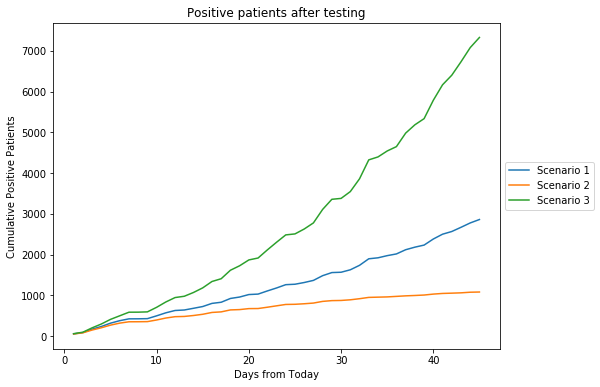

In [80]:

plt.figure(figsize=(8,6))
plt.plot(positive_patient_group_scen1.index, positive_patient_group_scen1['cumulative_positive'],label="Scenario 1")
plt.plot(positive_patient_group_scen2.index, positive_patient_group_scen2['cumulative_positive'],label="Scenario 2")
plt.plot(positive_patient_group_scen3.index, positive_patient_group_scen3['cumulative_positive'],label="Scenario 3")
plt.xlabel("Days from Today")
plt.ylabel("Cumulative Positive Patients")
plt.title("Positive patients after testing")
plt.legend(loc="center left",bbox_to_anchor=(1,0.5))

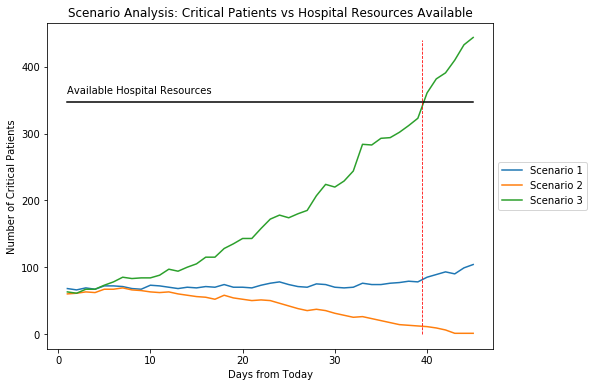

In [78]:

plt.figure(figsize=(8,6))
plt.plot(positive_patient_group_scen1.index, positive_patient_group_scen1['cases_icu'],label="Scenario 1")
plt.plot(positive_patient_group_scen2.index, positive_patient_group_scen2['cases_icu'],label="Scenario 2")
plt.plot(positive_patient_group_scen3.index, positive_patient_group_scen3['cases_icu'],label="Scenario 3")
plt.plot(positive_patient_group_scen3.index, [348] * 45, 'k-', lw=1.5)
plt.plot([39.5] * 45, range(0,450,10), 'k--', color='red', lw=0.8)
plt.annotate('Available Hospital Resources', xy=(1,360), xycoords='data')
plt.title('Scenario Analysis: Critical Patients vs Hospital Resources Available')
plt.ylabel('Number of Critical Patients')
plt.xlabel("Days from Today")
plt.legend(loc="center left",bbox_to_anchor=(1,0.5))